# Bucket Pricing

The business need to have prices calculated for some categories, based on sold prices.

# Library

In [1]:
library(ggplot2)
library(dplyr)
library(readr)
library(forcats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Read Data

In [2]:
getwd()

[1] "/Users/darias/Documents/Bucket_Pricing/Notebook"

In [3]:
data <- read_csv('/Users/darias/Documents/Bucket_Pricing/Data/bucket_pricing_data.csv')

Parsed with column specification:
cols(
  .default = col_character(),
  primary_relation = col_double(),
  FiscalYear = col_double(),
  sold_price = col_double(),
  tax = col_double(),
  ItemID = col_double(),
  cost = col_double(),
  item_categorization = col_double(),
  Inventory_Days = col_double()
)

See spec(...) for full column specifications.

Warning message:
“1 parsing failure.
   row  col expected actual                                                                  file
386161 cost a double   NULL '/Users/darias/Documents/Bucket_Pricing/Data/bucket_pricing_data.csv'
”


In [21]:
data$date <- substr(data$origindate,1,10) %>% as.Date

In [4]:
head(data)

Country primary_relation gid      origindate                FiscalYear
1 USA     423090953        NULL     2020-05-16 15:15:13 +0000 2020      
2 USA     422394768        NULL     2020-05-05 15:15:27 +0000 2020      
3 USA     422323783        NULL     2020-05-04 15:45:22 +0000 2020      
4 USA     429968844        NULL     2020-09-11 14:12:27 +0000 2020      
5 USA     427638654        NULL     2020-07-29 12:43:06 +0000 2020      
6 USA     428542690        27762814 2020-08-15 17:09:36 +0000 2020      
  original_price    sold_price tax      Item_ezid    ItemID    ⋯
1 124.9899978637695  81.00      0.00000 180280165137 480451189 ⋯
2 39.99               5.00      3.56440 112240289576 480506683 ⋯
3 154.99            100.00      0.00000 010130631692 480574129 ⋯
4 54.99              54.99      0.00000 030190520496 480576504 ⋯
5 54.9900016784668   39.99      0.00000 011580803369 480582634 ⋯
6 9.989999771118164   5.99     11.56815 011570483021 480587342 ⋯
  Tertiary         CategoryDesc                       item_type store transType
1 Power Tool       Circular Saw (No Special Features) GM        18028 Sales    
2 Clocks & Watches Regular Watch                      GM        11224 Sales    
3 Other            Sunglasses                         GM        01013 Sales    
4 Power Tool       Cordless Drill                     GM        03019 Sales    
5 Other            Purse/Handbag                      GM        01158 Sales    
6 Other            Collectible                        GM        01157 Sales    
  customerType Inventory_Days Manufacturer Model_Number item_cond
1 No Customer  201            PORTER-CABLE 324MAG       A        
2 No Customer  259            ROCAWEAR     RM7776       B        
3 No Customer  147            VERSAGE      NULL         A        
4 No Customer   85            DEWALT       DCD790       B        
5 No Customer  126            BRIGHTON     NULL         A        
6 Customer     231            LAVALAMP     VORTEX       B

# Coffee Makers examples

There is no category assigned for **Coffee Makers**, these are in two **Category Descriptions** :
 - Small Household Appliance
 - Small Kitchen Appliances

We will see this analyzing 5 popular coffee makers brands

In [5]:
data %>%
 filter(tolower(Manufacturer) %in% c('rancilio','san remo','ciamballi','expobar','faema') | grepl('nescafe',tolower(Manufacturer))) %>%
 group_by(tolower(Manufacturer),CategoryDesc) %>%
 tally %>%
 arrange(desc(n))

tolower(Manufacturer) CategoryDesc              n
1 rancilio              Small Household Appliance 2

# Fix sold price

Make a **floor** or **ceiling** on 5 on 5 integers for the sold price.

If the last number of a number is in 0,1,2, then that number will be floored:

For example:
 - 12
 - Convert: 10
 
If the last number of a number is in 5,6,7 then that number will be floored:

For example:
 - 57
 - Convert: 55


If the last number of a number is 3,4, then that number will be raised:

For example:
 - 14
 - Convert: 15


If the last number of a number is 8,9, then that number will be raised:

For example:
 - 89
 - Convert: 90

In [6]:
data %>%
 mutate(sold_price_fixed = sold_price/100,
        sold_price_fixed = round(sold_price_fixed/0.5,1)*0.5,
        sold_price_fixed = sold_price_fixed*100) -> data

# Descriptives

Function to get superior and inferior limits for a continous feature

In [7]:
LimInf_fun <- function(x){
    a <- boxplot(x, plot = FALSE)
    
    b <- a$stats[1]
    
    return(b)
}

In [8]:
LimSup_fun <- function(x){
    a <- boxplot(x, plot = FALSE)
    
    b <- a$stats[5]
    
    return(b)
}

Function to get skewness

In [9]:
skewness=function(x) {
m3=mean((x-mean(x))^3)
skew=m3/(sd(x)^3)
skew}

Function to get kurtosis

In [10]:
kurtosis=function(x) {
m4=mean((x-mean(x))^4) 
kurt=m4/(sd(x)^4)-3  
kurt}

Function to get the Variation Coefficient

In [11]:
CV=function(x){a <- mean(x)
               b <- sd(x)
               c <- b/a
               c}

Function to get de mode

In [12]:
mode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

## Household and Kitchen Appliance

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



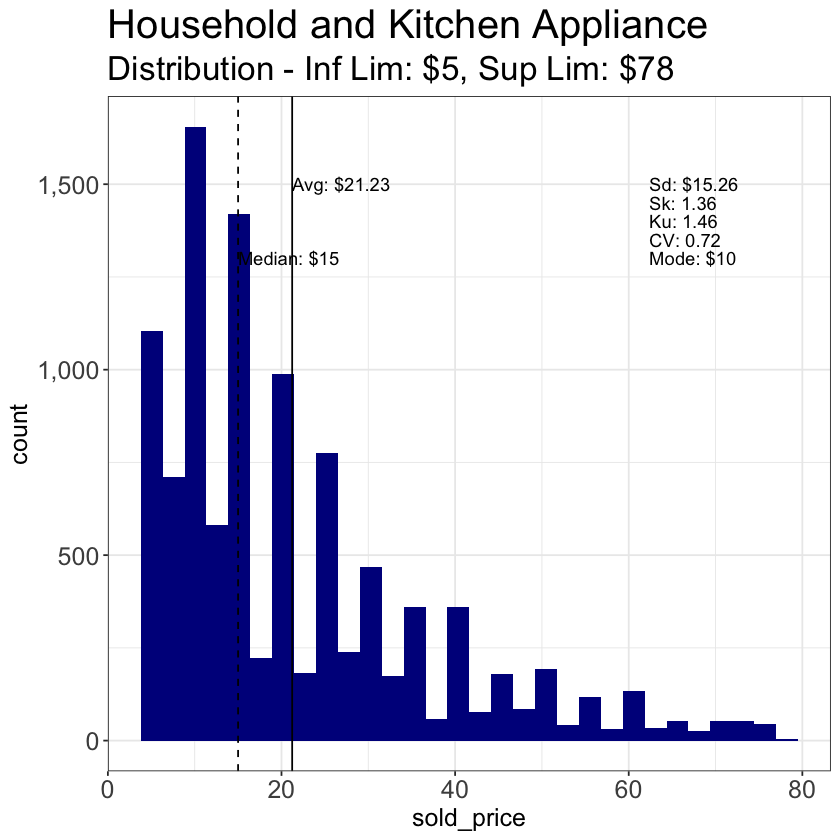

In [13]:
#data %>%
# filter(CategoryDesc %in% c('Small Household Appliance','Small Kitchen Appliances'),
#        sold_price > 1) %>%
# mutate(lim_inf = LimInf_fun(sold_price),
#        lim_sup = LimSup_fun(sold_price)) %>%
# filter(sold_price >= lim_inf, sold_price <= lim_sup) -> appliance_data

data %>%
 filter(CategoryDesc %in% c('Small Household Appliance','Small Kitchen Appliances'),
        sold_price > 1) %>%
 mutate(lim_inf = quantile(sold_price, 0.05),
        lim_sup = quantile(sold_price, 0.95)) %>%
 filter(sold_price >= lim_inf, sold_price <= lim_sup) -> appliance_data

li <- paste0('$',round(unique(appliance_data$lim_inf),0))
ls <- paste0('$',round(unique(appliance_data$lim_sup),0))

appliance_data %>%
 ggplot() +
 geom_histogram(aes(sold_price), fill = 'darkblue') +
 theme_bw() +
 ggtitle('Household and Kitchen Appliance', subtitle = paste0('Distribution - Inf Lim: ', li, ', Sup Lim: ', ls)) +
 scale_y_continuous(labels = scales::comma) +
 theme(axis.text.x  = element_text(size = 15),
       axis.text.y  = element_text(size = 15),
       axis.title.y = element_text(size = 15),
       axis.title.x = element_text(size = 15),
       title        = element_text(size = 20)) +
 geom_vline(xintercept = mean(appliance_data$sold_price)) +
 geom_vline(xintercept = median(appliance_data$sold_price), linetype = 2) +
 annotate(geom  = 'text',
          x     = mean(appliance_data$sold_price),
          y     = 1500,
          label = paste0('Avg: $', round(mean(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = median(appliance_data$sold_price),
          y     = 1300,
          label = paste0('Median: $', round(median(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1500,
          label = paste0('Sd: $', round(sd(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1450,
          label = paste0('Sk: ', round(skewness(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1400,
          label = paste0('Ku: ', round(kurtosis(appliance_data$sold_price),2)),
          hjust = 0)  +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1350,
          label = paste0('CV: ', round(CV(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1300,
          label = paste0('Mode: $', round(mode(appliance_data$sold_price_fixed),2)),
          hjust = 0)



## Household and Kitchen Appliance - 90B

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



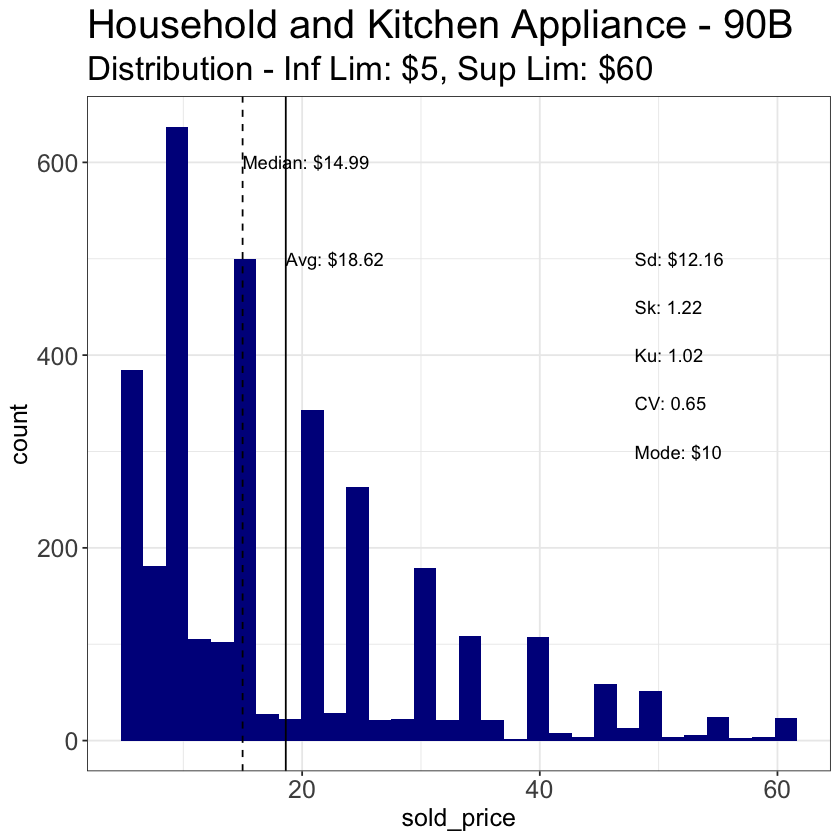

In [14]:
#data %>%
# filter(CategoryDesc %in% c('Small Household Appliance','Small Kitchen Appliances'),
#        sold_price > 1) %>%
# mutate(lim_inf = LimInf_fun(sold_price),
#        lim_sup = LimSup_fun(sold_price)) %>%
# filter(sold_price >= lim_inf, sold_price <= lim_sup) -> appliance_data

data %>%
 filter(CategoryDesc %in% c('Small Household Appliance','Small Kitchen Appliances'),
        sold_price > 1,
        item_cond == 'B',
        Inventory_Days <= 90) %>%
 mutate(lim_inf = quantile(sold_price, 0.05),
        lim_sup = quantile(sold_price, 0.95)) %>%
 filter(sold_price >= lim_inf, sold_price <= lim_sup) -> appliance_data

li <- paste0('$',round(unique(appliance_data$lim_inf),0))
ls <- paste0('$',round(unique(appliance_data$lim_sup),0))

appliance_data %>%
 ggplot() +
 geom_histogram(aes(sold_price), fill = 'darkblue') +
 theme_bw() +
 ggtitle('Household and Kitchen Appliance - 90B', subtitle = paste0('Distribution - Inf Lim: ', li, ', Sup Lim: ', ls)) +
 scale_y_continuous(labels = scales::comma) +
 theme(axis.text.x  = element_text(size = 15),
       axis.text.y  = element_text(size = 15),
       axis.title.y = element_text(size = 15),
       axis.title.x = element_text(size = 15),
       title        = element_text(size = 20)) +
 geom_vline(xintercept = mean(appliance_data$sold_price)) +
 geom_vline(xintercept = median(appliance_data$sold_price), linetype = 2) +
 annotate(geom  = 'text',
          x     = mean(appliance_data$sold_price),
          y     = 1500-1000,
          label = paste0('Avg: $', round(mean(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = median(appliance_data$sold_price),
          y     = 1300-700,
          label = paste0('Median: $', round(median(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1500-1000,
          label = paste0('Sd: $', round(sd(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1450-1000,
          label = paste0('Sk: ', round(skewness(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1400-1000,
          label = paste0('Ku: ', round(kurtosis(appliance_data$sold_price),2)),
          hjust = 0)  +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1350-1000,
          label = paste0('CV: ', round(CV(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1300-1000,
          label = paste0('Mode: $', round(mode(appliance_data$sold_price_fixed),2)),
          hjust = 0)




## Vaccum Cleaner

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



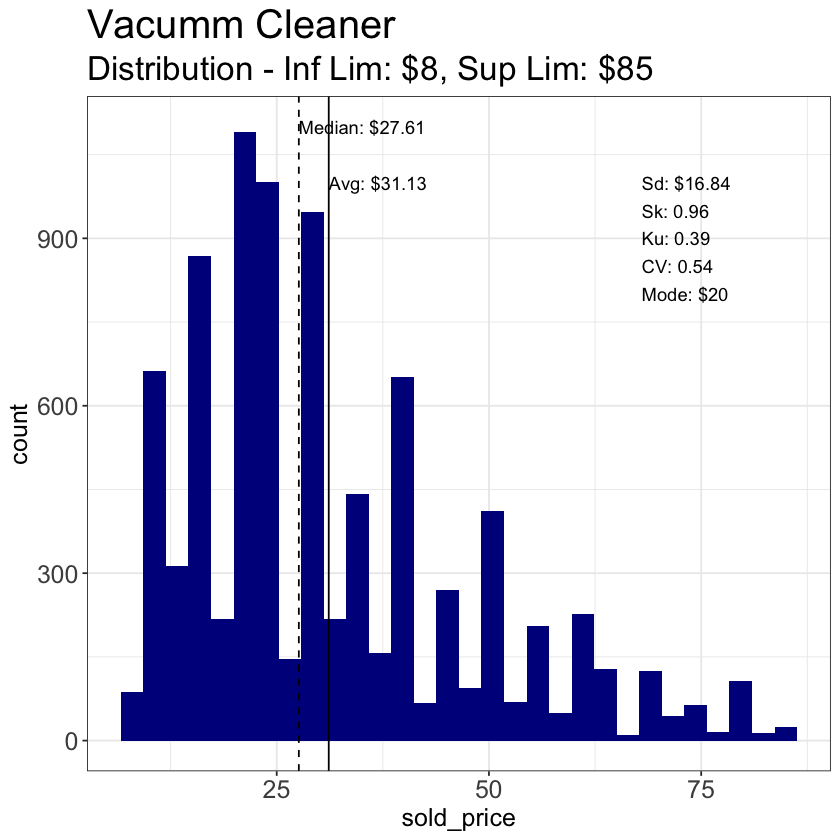

In [15]:
#data %>%
# filter(grepl('vacuum cleaner',tolower(CategoryDesc)),
#        sold_price > 1) %>%
# mutate(lim_inf = LimInf_fun(sold_price),
#        lim_sup = LimSup_fun(sold_price)) %>%
# filter(sold_price >= lim_inf, sold_price <= lim_sup) -> appliance_data

data %>%
 filter(grepl('vacuum cleaner',tolower(CategoryDesc)),
        sold_price > 1) %>%
 mutate(lim_inf = quantile(sold_price, 0.05),
        lim_sup = quantile(sold_price, 0.95)) %>%
 filter(sold_price >= lim_inf, sold_price <= lim_sup) -> appliance_data

li <- paste0('$',round(unique(appliance_data$lim_inf),0))
ls <- paste0('$',round(unique(appliance_data$lim_sup),0))

appliance_data %>%
 ggplot() +
 geom_histogram(aes(sold_price), fill = 'darkblue') +
 theme_bw() +
 ggtitle('Vacumm Cleaner', subtitle = paste0('Distribution - Inf Lim: ', li, ', Sup Lim: ', ls)) +
 scale_y_continuous(labels = scales::comma) +
 theme(axis.text.x  = element_text(size = 15),
       axis.text.y  = element_text(size = 15),
       axis.title.y = element_text(size = 15),
       axis.title.x = element_text(size = 15),
       title        = element_text(size = 20)) +
 geom_vline(xintercept = mean(appliance_data$sold_price)) +
 geom_vline(xintercept = median(appliance_data$sold_price), linetype = 2) +
 annotate(geom  = 'text',
          x     = mean(appliance_data$sold_price),
          y     = 1500-500,
          label = paste0('Avg: $', round(mean(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = median(appliance_data$sold_price),
          y     = 1300-200,
          label = paste0('Median: $', round(median(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1500-500,
          label = paste0('Sd: $', round(sd(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1450-500,
          label = paste0('Sk: ', round(skewness(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1400-500,
          label = paste0('Ku: ', round(kurtosis(appliance_data$sold_price),2)),
          hjust = 0)  +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1350-500,
          label = paste0('CV: ', round(CV(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1300-500,
          label = paste0('Mode: $', round(mode(appliance_data$sold_price_fixed),2)),
          hjust = 0)

## Vaccum Cleaner - 90B

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



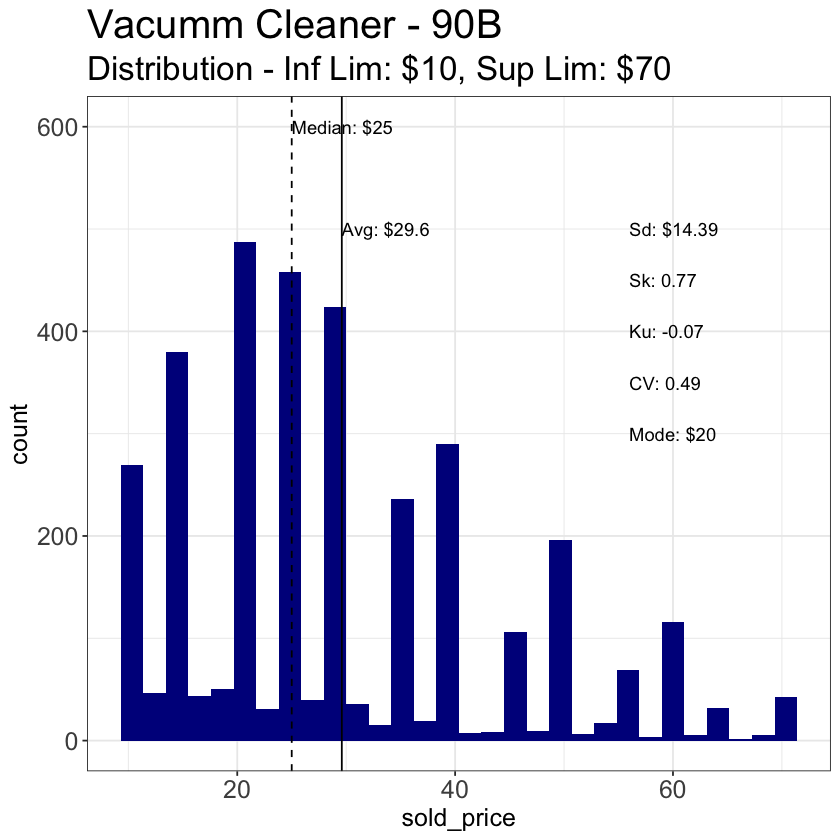

In [16]:
#data %>%
# filter(grepl('vacuum cleaner',tolower(CategoryDesc)),
#        sold_price > 1) %>%
# mutate(lim_inf = LimInf_fun(sold_price),
#        lim_sup = LimSup_fun(sold_price)) %>%
# filter(sold_price >= lim_inf, sold_price <= lim_sup) -> appliance_data

data %>%
 filter(grepl('vacuum cleaner',tolower(CategoryDesc)),
        sold_price > 1,
        item_cond == 'B',
        Inventory_Days <= 90) %>%
 mutate(lim_inf = quantile(sold_price, 0.05),
        lim_sup = quantile(sold_price, 0.95)) %>%
 filter(sold_price >= lim_inf, sold_price <= lim_sup) -> appliance_data

li <- paste0('$',round(unique(appliance_data$lim_inf),0))
ls <- paste0('$',round(unique(appliance_data$lim_sup),0))

appliance_data %>%
 ggplot() +
 geom_histogram(aes(sold_price), fill = 'darkblue') +
 theme_bw() +
 ggtitle('Vacumm Cleaner - 90B', subtitle = paste0('Distribution - Inf Lim: ', li, ', Sup Lim: ', ls)) +
 scale_y_continuous(labels = scales::comma) +
 theme(axis.text.x  = element_text(size = 15),
       axis.text.y  = element_text(size = 15),
       axis.title.y = element_text(size = 15),
       axis.title.x = element_text(size = 15),
       title        = element_text(size = 20)) +
 geom_vline(xintercept = mean(appliance_data$sold_price)) +
 geom_vline(xintercept = median(appliance_data$sold_price), linetype = 2) +
 annotate(geom  = 'text',
          x     = mean(appliance_data$sold_price),
          y     = 1500-1000,
          label = paste0('Avg: $', round(mean(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = median(appliance_data$sold_price),
          y     = 1300-700,
          label = paste0('Median: $', round(median(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1500-1000,
          label = paste0('Sd: $', round(sd(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1450-1000,
          label = paste0('Sk: ', round(skewness(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1400-1000,
          label = paste0('Ku: ', round(kurtosis(appliance_data$sold_price),2)),
          hjust = 0)  +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1350-1000,
          label = paste0('CV: ', round(CV(appliance_data$sold_price),2)),
          hjust = 0) +
 annotate(geom  = 'text',
          x     = max(appliance_data$sold_price) - max(appliance_data$sold_price)*0.2,
          y     = 1300-1000,
          label = paste0('Mode: $', round(mode(appliance_data$sold_price_fixed),2)),
          hjust = 0)

# Linear Regression

Fit a **Linear Regression** to get the impact of Appliances and Vacumm

$$SoldPrice_i = \alpha + \beta_0*\theta_i + \epsilon_i$$

Where $\theta$ is the indicator for the category

In [29]:
data %>%
 filter(grepl('vacuum cleaner',tolower(CategoryDesc)) | CategoryDesc %in% c('Small Household Appliance','Small Kitchen Appliances')) %>%
 filter(sold_price > 1,
        item_cond == 'B',
        Inventory_Days <= 90) %>%
 mutate(Category = ifelse(CategoryDesc %in% c('Small Household Appliance','Small Kitchen Appliances'), 'Appliances', 'Vacuum'),
        Category = as.factor(Category),
        month    = format(date,'%m') %>% as.factor) %>%
 group_by(Category) %>%
 mutate(lim_inf = quantile(sold_price, 0.05),
        lim_sup = quantile(sold_price, 0.95)) %>%
 filter(sold_price >= lim_inf, sold_price <= lim_sup) %>%
 select(sold_price,Category,month) -> data_train

 lm(sold_price~.,data = data_train) -> lr

In [30]:
summary(lr)


Call:
lm(formula = sold_price ~ ., data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.082  -9.518  -3.784   6.450  42.203 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    18.774172   0.400584  46.867   <2e-16 ***
CategoryVacuum 10.958351   0.326011  33.613   <2e-16 ***
month06         0.246465   0.575140   0.429    0.668    
month07        -0.224124   0.589068  -0.380    0.704    
month08         0.339405   0.574473   0.591    0.555    
month09        -0.629915   0.566545  -1.112    0.266    
month10         0.001868   0.545977   0.003    0.997    
month11        -0.987124   0.617534  -1.598    0.110    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.35 on 6721 degrees of freedom
Multiple R-squared:  0.1452,	Adjusted R-squared:  0.1443 
F-statistic: 163.1 on 7 and 6721 DF,  p-value: < 2.2e-16


In [31]:
data_train$pred <- predict(lr,data_train)



In [35]:
data_train %>% head(20)


sold_price Category   month pred    
1  19.00      Appliances 06    19.02064
2  29.99      Vacuum     09    29.10261
3  39.99      Vacuum     08    30.07193
4  49.99      Vacuum     05    29.73252
5  24.99      Vacuum     05    29.73252
6  24.99      Vacuum     05    29.73252
7  19.00      Vacuum     07    29.50840
8  49.99      Vacuum     06    29.97899
9  24.99      Vacuum     05    29.73252
10 29.99      Vacuum     05    29.73252
11 49.99      Vacuum     06    29.97899
12 35.00      Vacuum     08    30.07193
13  9.99      Vacuum     08    30.07193
14 24.99      Appliances 05    18.77417
15 14.99      Vacuum     07    29.50840
16 49.50      Vacuum     05    29.73252
17 59.99      Vacuum     05    29.73252
18 20.00      Vacuum     08    30.07193
19 60.00      Appliances 06    19.02064
20 20.00      Vacuum     05    29.73252